# Classical demo of logistic regression

In [23]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt


import sklearn
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# This is a bit of magic to make matplotlib figures appear inline in the notebook
# rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0,10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'viridis'

# Plot functions

In [24]:
def plot_twoclass_data(X,y,xlabel,ylabel,legend):
    fig = plt.figure()
    X0 = X[y==0.0]
    X1 = X[y==1.0]
    plt.scatter(X0[:,0],X0[:,1], s=80, label = legend[0],marker='_',c='navy')
    plt.scatter(X1[:,0],X1[:,1], s = 80, label=legend[1],marker='P',c='orange')
    plt.xlabel(xlabel,fontsize=18)
    plt.ylabel(ylabel,fontsize=18)
    plt.legend(loc="upper right",fontsize=14)

def plot_decision_boundary_logistic(X,y,model,  xlabel, ylabel, legend):
    plot_twoclass_data(X,y.squeeze(),xlabel,ylabel,legend)
    
    # create a mesh to plot in
    h = 0.01
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                         np.arange(x2_min, x2_max, h))

    # make predictions on this mesh
    
    Z = model.predict_proba((np.vstack([xx1.flatten(), xx2.flatten()]).T))[:,1]
   
    # Put the result into a color contour plot
    Z = Z.reshape(xx1.shape)
    plt.contour(xx1,xx2,Z,cmap='gray',levels=[0.5])
    
def plot_decision_boundary_model_poly(X,y,model,poly, reg, xlabel, ylabel, legend):
    plot_twoclass_data(X,y.squeeze(),xlabel,ylabel,legend)
    
    # create a mesh to plot in
    h = 0.01
    x1_min, x1_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    x2_min, x2_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h),
                         np.arange(x2_min, x2_max, h))

    # do basis function expansion before prediction
    
    Z = model.predict_proba((poly.transform(np.vstack([xx1.flatten(), xx2.flatten()]).T)))[:,1]
   
     # Put the result into a color contour plot
    Z = Z.reshape(xx1.shape)
    
    plt.contour(xx1,xx2,Z,cmap=plt.cm.gray,levels=[0.5])
    plt.title("Decision boundary for lambda = " + str(reg),fontsize=16)



# Nearly linearly separable data

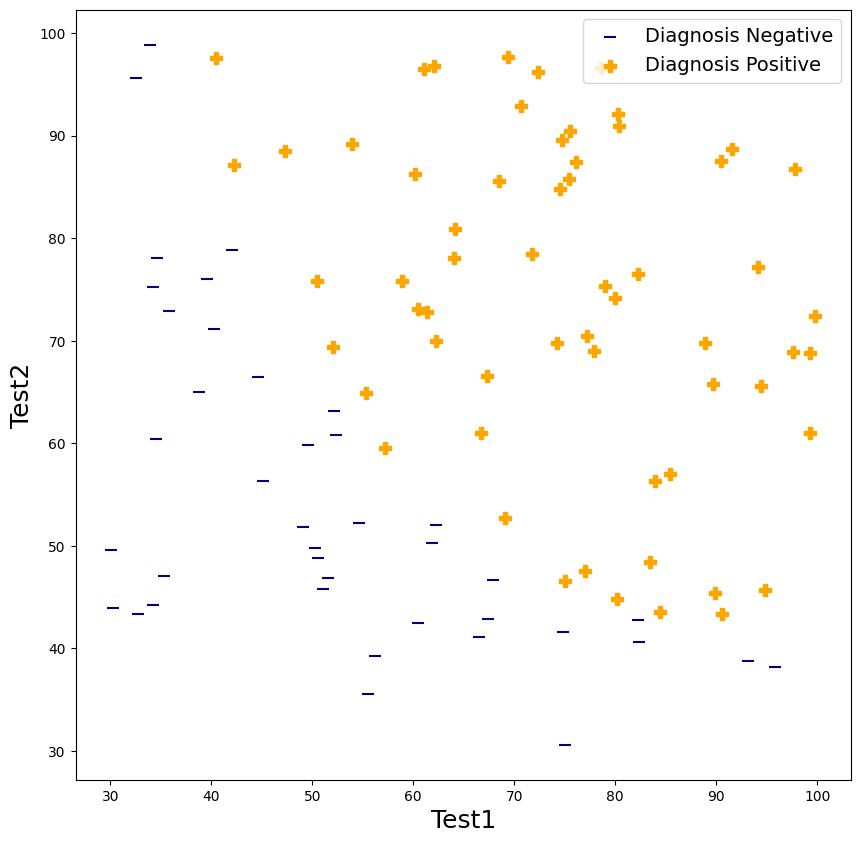

In [25]:
data = pd.read_csv('data/labtests.csv')
X = data.iloc[:,:2].values
y = data.iloc[:,2].values

plot_twoclass_data(X,y,data.columns[0], data.columns[1],['Diagnosis Negative', 'Diagnosis Positive'])

# Logistic regression

In [31]:
from sklearn.linear_model import LogisticRegression

# small C values indicate stronger regularization.
C = 10
clf = LogisticRegression(random_state=0,C=C).fit(X, y)

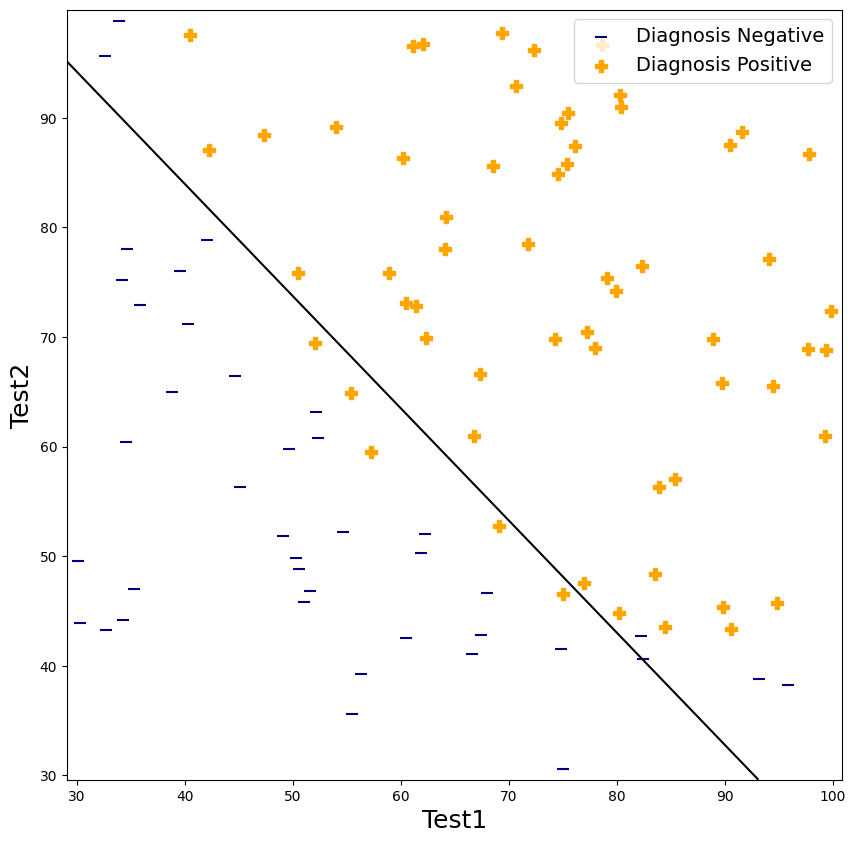

In [32]:
plot_decision_boundary_logistic(X,y,clf, 'Test1', 'Test2', ['Diagnosis Negative', 'Diagnosis Positive'])

# L2 regularized logistic regression

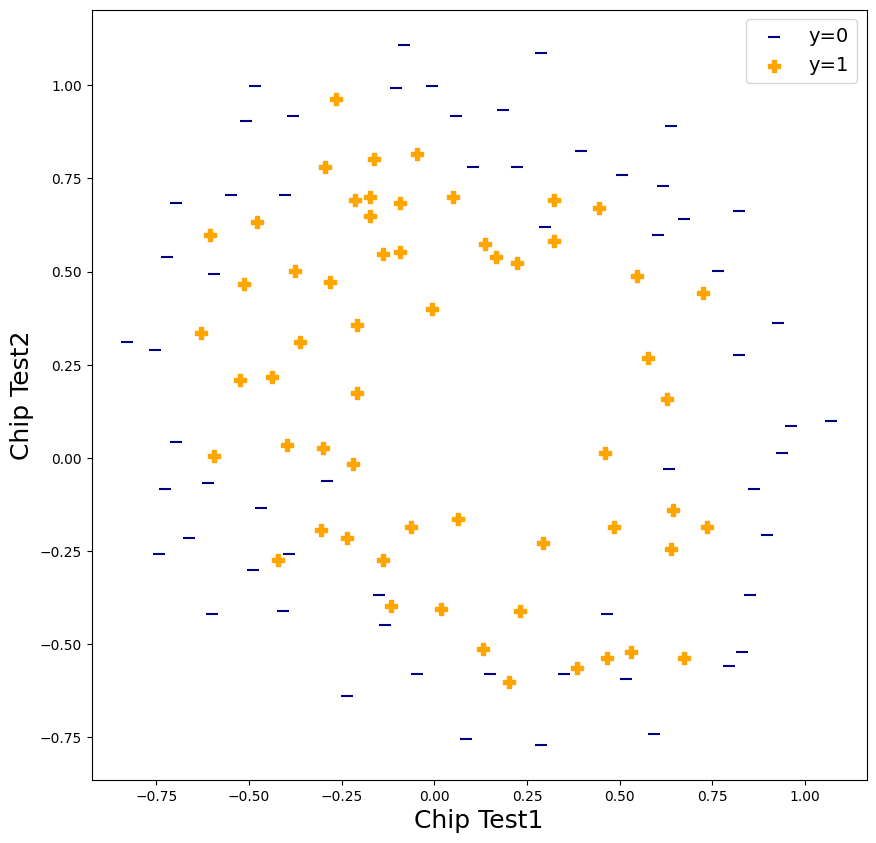

In [33]:
data = pd.read_csv('data/chipdata.csv')
X = data.iloc[:,:2].values
y = data['y'].values

plot_twoclass_data(X,y,'Chip Test1', 'Chip Test2',['y=0','y=1'])

In [34]:
poly = PolynomialFeatures(degree = 3,include_bias=False)
Xpoly = poly.fit_transform(X)
features = poly.get_feature_names_out()
#y = y.reshape((-1,1))

In [38]:
# try varying C from 0.01, 0.1, 1.0, 10
C = 10
clf = LogisticRegression(random_state=0,C=C).fit(Xpoly, y)

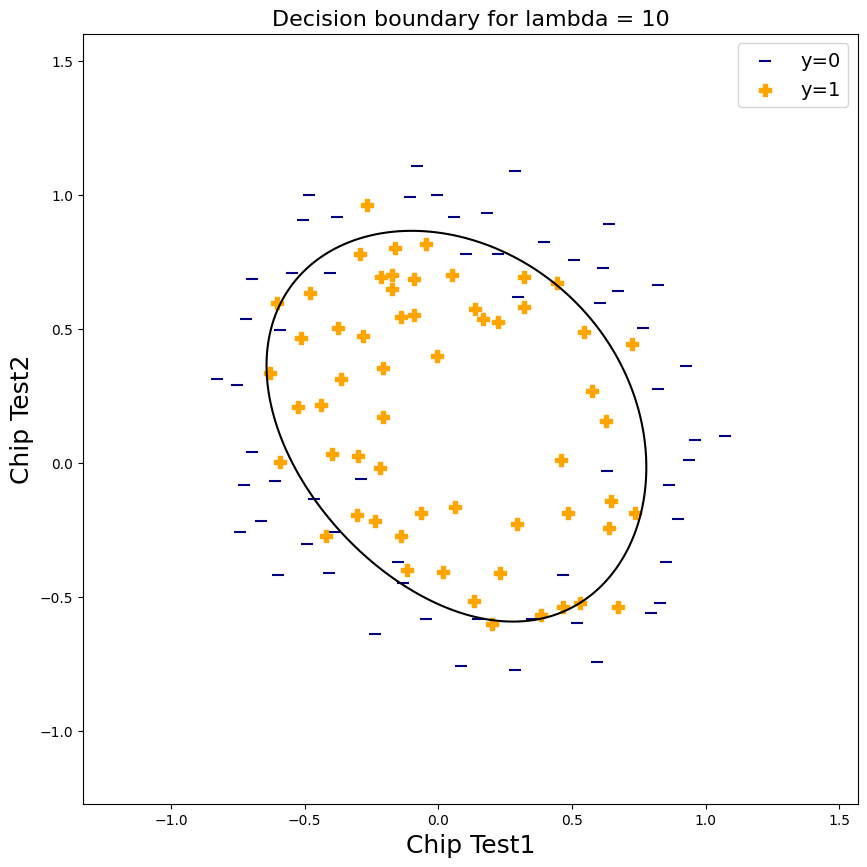

In [39]:
plot_decision_boundary_model_poly(X,y,clf,poly,C,'Chip Test1', 'Chip Test2',['y=0','y=1'])